### Import Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Import Data

In [2]:
boston=load_boston()
boston_df=pd.DataFrame(data=boston.data,columns=boston.feature_names)
boston_df['target']=boston.target
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


### Data Understanding

In [3]:
boston_df.shape

(506, 14)

In [4]:
boston_df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
target     float64
dtype: object

In [5]:
boston_df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

### Model Building

In [6]:
X=boston_df.drop('target',axis=1)
y=boston_df['target']

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [8]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((379, 13), (127, 13), (379,), (127,))

### Model Training

In [9]:
linear_model=LinearRegression()
linear_model.fit(X_train,y_train)

LinearRegression()

### Model Testing

In [10]:
y_pred_lr=linear_model.predict(X_test)

### Model Evaluation

In [11]:
mean_squared_error(y_test,y_pred_lr)

35.091782426221585

In [12]:
X_train.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [13]:
linear_model.coef_

array([-1.01137696e-01,  2.55152065e-02,  1.92697998e-02,  1.12688149e+00,
       -1.74523463e+01,  5.50155821e+00, -5.11612644e-03, -1.16627302e+00,
        2.42435633e-01, -1.05777273e-02, -1.05333282e+00,  1.04014406e-02,
       -3.40497905e-01])

In [14]:
Coeff_data = pd.DataFrame(data={'features':X_train.columns,'coeff':linear_model.coef_})
Coeff_data

,features,coeff
0,CRIM,-0.101138
1,ZN,0.025515
2,INDUS,0.019270
3,CHAS,1.126881
4,NOX,-17.452346
5,RM,5.501558
6,AGE,-0.005116
7,DIS,-1.166273
8,RAD,0.242436
9,TAX,-0.010578


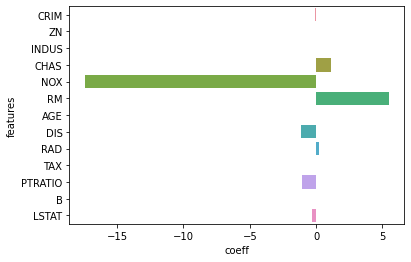

In [15]:
sns.barplot(x='coeff',y='features',data=Coeff_data)
plt.show()

### Ridge Regression

In [16]:
ridge_regressor=Ridge(alpha=1.0)

In [17]:
ridge_regressor.fit(X_train,y_train)

Ridge()

In [18]:
y_pred_ridge=ridge_regressor.predict(X_test)

In [19]:
mean_squared_error(y_test,y_pred_ridge)

35.38350102795945

In [20]:
ridge_regressor.coef_

array([-0.09866448,  0.02688033, -0.01703241,  1.03835278, -9.49437183,
        5.56749887, -0.01259164, -1.04867678,  0.22640334, -0.01131399,
       -0.95719489,  0.01109365, -0.34274661])

In [21]:
ridge_coeff_data=pd.DataFrame(data={'features':X_train.columns,'coeff':ridge_regressor.coef_})
ridge_coeff_data

,features,coeff
0,CRIM,-0.098664
1,ZN,0.026880
2,INDUS,-0.017032
3,CHAS,1.038353
4,NOX,-9.494372
5,RM,5.567499
6,AGE,-0.012592
7,DIS,-1.048677
8,RAD,0.226403
9,TAX,-0.011314


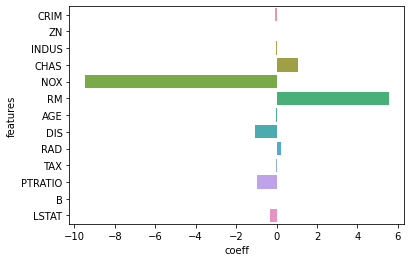

In [22]:
sns.barplot(x='coeff',y='features',data=ridge_coeff_data)
plt.show()

### Lasso Regression

In [23]:
lasso_regressor=Lasso(alpha=1.0)

In [24]:
lasso_regressor.fit(X_train,y_train)

Lasso()

In [25]:
y_pred_lasso=lasso_regressor.predict(X_test)

In [26]:
mean_squared_error(y_test,y_pred_lasso)

30.6722367300954

In [27]:
lasso_regressor.coef_

array([-0.05013508,  0.03162161, -0.01225887,  0.        , -0.        ,
        2.21075927,  0.02284812, -0.37251877,  0.21172463, -0.01331224,
       -0.80032588,  0.00778662, -0.64592218])

In [28]:
lasso_coeff_data=pd.DataFrame(data={'features':X_train.columns,'coeff':lasso_regressor.coef_})
lasso_coeff_data

,features,coeff
0,CRIM,-0.050135
1,ZN,0.031622
2,INDUS,-0.012259
3,CHAS,0.000000
4,NOX,-0.000000
5,RM,2.210759
6,AGE,0.022848
7,DIS,-0.372519
8,RAD,0.211725
9,TAX,-0.013312


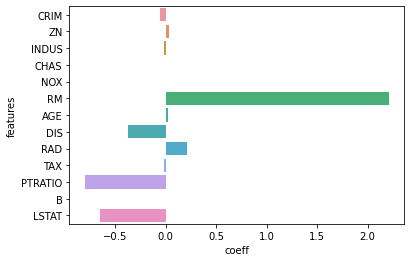

In [29]:
sns.barplot(x='coeff',y='features',data=lasso_coeff_data)
plt.show()

### Elastic Net Regression

In [30]:
elastic_net_regressor=ElasticNet(alpha=0.4,l1_ratio=0.5)

In [31]:
elastic_net_regressor.fit(X_train,y_train)

ElasticNet(alpha=0.4)

In [32]:
y_pred_elastic_net=elastic_net_regressor.predict(X_test)

In [33]:
mean_squared_error(y_test,y_pred_elastic_net)

29.66244540525271

In [34]:
elastic_net_regressor.coef_

array([-0.08344874,  0.03998152, -0.07877997,  0.        , -0.        ,
        2.70374288,  0.01031857, -0.816828  ,  0.26526758, -0.01415396,
       -0.8912158 ,  0.00879301, -0.59678195])

In [35]:
elastic_net_coeff_data=pd.DataFrame(data={'features':X_train.columns,'coeff':elastic_net_regressor.coef_})
elastic_net_coeff_data

,features,coeff
0,CRIM,-0.083449
1,ZN,0.039982
2,INDUS,-0.078780
3,CHAS,0.000000
4,NOX,-0.000000
5,RM,2.703743
6,AGE,0.010319
7,DIS,-0.816828
8,RAD,0.265268
9,TAX,-0.014154


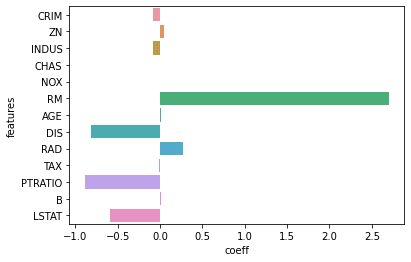

In [36]:
sns.barplot(x='coeff',y='features',data=elastic_net_coeff_data)
plt.show()

### End !!!